In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
import itertools
from astropy.stats import sigma_clipped_stats
import custom_funs as cf

In [3]:
from joblib import load, dump

In [4]:
storefile = '/mnt/clemente/bos0109/table_store2.h5'

store = pd.HDFStore(storefile)
store.open()

#sns.set_context(font_scale=16)
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['text.usetex'] = False

In [5]:
print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: /mnt/clemente/bos0109/table_store2.h5
/c_simus                 frame        (shape->[3272784,26]) 
/c_subset_hot            frame        (shape->[7508763,16]) 
/c_subset_ois            frame        (shape->[3576661,14]) 
/c_subset_sps            frame        (shape->[4637266,13]) 
/c_subset_zps            frame        (shape->[5103154,14]) 
/c_und_h                 frame        (shape->[1301493,5])  
/c_und_o                 frame        (shape->[1676071,5])  
/c_und_s                 frame        (shape->[1092394,5])  
/c_und_z                 frame        (shape->[1339719,5])  
/dt_hot                  frame        (shape->[10144579,82])
/dt_ois                  frame        (shape->[5723077,82]) 
/dt_sps                  frame        (shape->[7124177,71]) 
/dt_zps                  frame        (shape->[7787511,82]) 
/ids_mix                 frame        (shape->[35126,14])   
/merged                  frame        (shape->[26532,15])  

In [6]:
simus = store['c_simus']

In [7]:
und_s = store['c_und_s']
subset_sps = store['c_subset_sps']
und_z = store['c_und_z']
subset_zps = store['c_subset_zps']
und_h = store['c_und_h']
subset_hot = store['c_subset_hot']
und_o = store['c_und_o']
subset_ois = store['c_subset_ois']

In [8]:
merged = store['merged']
selected = merged[merged.selected==True]
simulations = store['simulations']

In [9]:
sps_rec = load('./plots/new_ml_sps_parallel/record_sps.joblib')
zps_rec = load('./plots/new_ml_zps_parallel/record_zps.joblib')
ois_rec = load('./plots/new_ml_ois_parallel/record_ois.joblib')
hot_rec = load('./plots/new_ml_hot_parallel/record_hot.joblib')

In [10]:
sps_rec.columns

Index(['id', 'y', 'y_pred_knn0', 'y_pred_knn', 'y_pred_rfo0', 'y_pred_rfo',
       'y_pred_svc0', 'y_pred_svc'],
      dtype='object')

In [11]:
subset_sps.columns

Index(['id', 'mean_goyet', 'image_id', 'id_simulation', 'mag', 'sim_mag',
       'sim_id', 'goyet', 'goyet_iso', 'mean_goyet_iso', 'IS_REAL', 'p05',
       'p95'],
      dtype='object')

In [12]:
subset_sps = pd.merge(left=subset_sps, right=sps_rec, on='id', how='inner')
subset_zps = pd.merge(left=subset_zps, right=zps_rec, on='id', how='inner')
subset_ois = pd.merge(left=subset_ois, right=ois_rec, on='id', how='inner')
subset_hot = pd.merge(left=subset_hot, right=hot_rec, on='id', how='inner')

In [13]:
np.hstack([und_o.app_mag.values, subset_ois[(subset_ois.y_pred_rfo==0)&(subset_ois.y==1)].sim_mag.values])

array([21.5781634 , 24.40393134, 19.3911865 , ..., 20.46832657,
       20.89058113, 16.79144096])

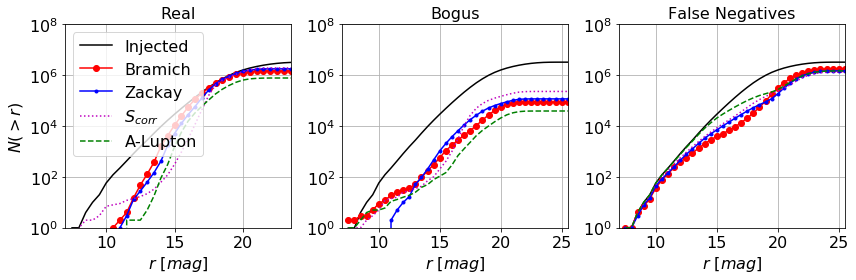

In [14]:
plt.figure(figsize=(12,4))
plt.title('Luminosity function', fontsize=14)
cumulative=True
#magnitude bins
bins = np.arange(7, 26.5, 0.5)
plt.rcParams['text.usetex'] = False

plt.subplot(131)
x_bins, vals = cf.custom_histogram(simus.app_mag.values, bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'black', label='Injected')

x_bins, vals = cf.custom_histogram(subset_ois[(subset_ois.y_pred_rfo==True)&(subset_ois.y==True)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'ro-', label='Bramich')

x_bins, vals = cf.custom_histogram(subset_zps[(subset_zps.y_pred_rfo==True)&(subset_zps.y==True)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'b.-', label='Zackay')

x_bins, vals = cf.custom_histogram(subset_sps[(subset_sps.y_pred_rfo==True)&(subset_sps.y==True)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'm:', label='$S_{corr}$')

x_bins, vals = cf.custom_histogram(subset_hot[(subset_hot.y_pred_rfo==True)&(subset_hot.y==True)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'g--', label='A-Lupton')

if cumulative:
    plt.ylabel(r'$N(>r)$', fontsize=16)
else:
    plt.ylabel(r'$N(m)dm$', fontsize=16)
plt.ylim(1, 1e8)
plt.xlim(7., 23.5)
plt.title('Real', fontsize=16)
#plt.ylabel(r'$N(m)dm$', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.xlabel(r'$r \ [mag]$', fontsize=16)
#plt.ylim(50, 280000)
plt.tick_params(labelsize=16)
plt.grid()
plt.subplot(132)
x_bins, vals = cf.custom_histogram(simus.app_mag.values, bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'black', label='Injected')
x_bins, vals = cf.custom_histogram(subset_ois[(subset_ois.y_pred_rfo==True)&(subset_ois.y==False)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'ro-', label='Bramich')
x_bins, vals = cf.custom_histogram(subset_zps[(subset_zps.y_pred_rfo==True)&(subset_zps.y==False)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'b.-', label='Zackay')
x_bins, vals = cf.custom_histogram(subset_sps[(subset_sps.y_pred_rfo==True)&(subset_sps.y==False)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'm:', label='$S_{corr}$')
x_bins, vals = cf.custom_histogram(subset_hot[(subset_hot.y_pred_rfo==True)&(subset_hot.y==False)].mag.values,
                                bins=bins, cumulative=cumulative)
plt.semilogy(x_bins, vals, 'g--', label='A-Lupton')
plt.xlim(7., 25.5)
plt.ylim(1, 1e8)
#plt.ylabel(r'$N(m)dm$', fontsize=16)
#plt.legend(loc='best', fontsize=16)
plt.xlabel(r'$r \ [mag]$', fontsize=16)
plt.title('Bogus', fontsize=16)
#plt.ylim(50, 280000)
plt.tick_params(labelsize=16)
plt.grid()
plt.subplot(133)
plt.title('False Negatives', fontsize=16)
x_bins, vals = cf.custom_histogram(simus.app_mag.values, bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'black', label='Injected')
x_bins, vals = cf.custom_histogram(np.hstack([und_o.app_mag.values, 
                                              subset_ois.loc[(subset_ois.y_pred_rfo==False)&(subset_ois.y==True)].sim_mag.values]).flatten(), bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'ro-', label='Bramich')
x_bins, vals = cf.custom_histogram(np.hstack([und_z.app_mag.values, 
                                              subset_zps.loc[(subset_zps.y_pred_rfo==False)&(subset_zps.y==True)].sim_mag.values]).flatten(), bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'b.-', label='Zackay')
x_bins, vals = cf.custom_histogram(np.hstack([und_s.app_mag.values, 
                                              subset_sps.loc[(subset_sps.y_pred_rfo==False)&(subset_sps.y==True)].sim_mag.values]).flatten(), bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'm:', label='$S_{corr}$')
x_bins, vals = cf.custom_histogram(np.hstack([und_h.app_mag.values, 
                                              subset_hot.loc[(subset_hot.y_pred_rfo==False)&(subset_hot.y==True)].sim_mag.values]).flatten(), bins=bins,
                                cumulative=cumulative)
plt.semilogy(x_bins, vals, 'g--', label='A-Lupton')
#plt.legend(loc='lower right', fontsize=16)
plt.xlabel(r'$r \ [mag]$', fontsize=16)
#plt.title('Cummulative Luminosity Function of False Negatives', fontsize=14)
plt.tick_params(labelsize=16)
plt.xlim(7., 25.5)
#plt.show()
plt.ylim(1, 1e8)
plt.grid()
plt.tight_layout()
plt.savefig('combined_luminosities_functions_postML.pdf', format='pdf', dpi=720)

## Figuras de distancia radial 

In [15]:
dt_sps = store['dt_sps']
dt_sps = cf.optimize_df(dt_sps)

dt_sps['SN'] = dt_sps.cflux/np.sqrt(dt_sps.cflux)
dt_sps['MU'] = dt_sps.mag/(dt_sps.a*dt_sps.b)

1888.77 MB
1888.77 MB
Memory increased, returning original


In [16]:
dt_hot = store['dt_hot']

dt_hot['MU'] = dt_hot.mag/(dt_hot.A_IMAGE*dt_hot.B_IMAGE)
dt_hot['SN'] = dt_hot.FLUX_APER/dt_hot.FLUXERR_APER

In [17]:
ids = selected['image_id_hot'].drop_duplicates().values
dt_hot = dt_hot.loc[dt_hot['image_id'].isin(ids)].drop_duplicates()

ids = subset_hot['id'].drop_duplicates().values
dt_hot = dt_hot.loc[dt_hot['id'].isin(ids)].drop_duplicates()

In [18]:
selsimus = pd.merge(left=selected, right=simulations,
                   left_on='simulation_id', right_on='id', how='inner')

In [19]:
cols_sim = ['simulation_id', 'image_id_hot', 'ref_fwhm', 'new_fwhm', 'px_scale',
            'ref_back_sbright', 'new_back_sbright', 'exp_time',
            'm1_diam', 'mean_goyet_hot', 'ref_starzp', 'ref_starslope']

In [20]:
dt_imp = pd.merge(left=dt_hot[['image_id']], right=selsimus[cols_sim],
                 left_on='image_id', right_on='image_id_hot', how='left')

In [21]:
dt_hot.drop(['id_simulation', 'ref_fwhm', 'new_fwhm', 'px_scale', 'm1_diam',
             'exp_time', 'ref_back_sbright', 'm1_diam', 'ref_starzp', 'ref_starslope'], axis=1, inplace=True)

In [22]:
dt_hot['id_simulation'] = dt_imp.simulation_id.values
dt_hot['ref_fwhm'] = dt_imp.ref_fwhm.values
dt_hot['new_fwhm'] = dt_imp.new_fwhm.values
dt_hot['px_scale'] = dt_imp.px_scale.values
dt_hot['m1_diam'] = dt_imp.m1_diam.values
dt_hot['exp_time'] = dt_imp.exp_time.values
dt_hot['ref_back_sbright'] = dt_imp.ref_back_sbright.values
dt_hot['new_back_sbright'] = dt_imp.new_back_sbright.values
dt_hot['m1_diam'] = dt_imp.m1_diam.values
dt_hot['ref_starzp'] = dt_imp.ref_starzp.values
dt_hot['ref_starslope'] = dt_imp.ref_starslope.values


In [23]:
del(dt_imp)

In [24]:
dt_zps = store['dt_zps']
dt_zps = cf.optimize_df(dt_zps)

dt_zps['SN'] = dt_zps.FLUX_APER/np.sqrt(dt_zps.FLUXERR_APER)
dt_zps['MU'] = dt_zps.mag/(dt_zps.A_IMAGE*dt_zps.B_IMAGE)

2376.56 MB
2376.56 MB
Memory increased, returning original


In [25]:
dt_ois = store['dt_ois']
dt_ois = cf.optimize_df(dt_ois)

1746.54 MB
1746.54 MB
Memory increased, returning original


In [26]:
dt_ois['SN'] = dt_ois.FLUX_APER/np.sqrt(dt_ois.FLUXERR_APER)
dt_ois['MU'] = dt_ois.mag/(dt_ois.A_IMAGE*dt_ois.B_IMAGE)

In [27]:
und_h.columns

Index(['x', 'y', 'app_mag', 'image_id', 'simulated_id'], dtype='object')

In [28]:
und_h = pd.merge(left=und_h, right=simus[['id', 'app_mag', 'r_scales', 'PA_angle', 'gx_mag',
                                       'gx_code', 'gx_x', 'gx_y', 'gx_bulge_total', 
                                       'gx_bulge_eff_r', 'gx_bulge_app_aspect', 
                                       'gx_bulge_PA', 'gx_disk_scale_len', 
                                       'gx_disk_app_aspect', 'gx_disk_PA', 
                                       'gx_z', 'gx_hubble_type','simulation_id', 'simage_id']].drop_duplicates(),
                left_on='simulated_id', right_on='id')

In [29]:
und_o = pd.merge(left=und_o, right=simus[['id', 'app_mag', 'r_scales', 'PA_angle', 'gx_mag',
                                       'gx_code', 'gx_x', 'gx_y', 'gx_bulge_total', 
                                       'gx_bulge_eff_r', 'gx_bulge_app_aspect', 
                                       'gx_bulge_PA', 'gx_disk_scale_len', 
                                       'gx_disk_app_aspect', 'gx_disk_PA', 
                                       'gx_z', 'gx_hubble_type','simulation_id', 'simage_id']].drop_duplicates(),
                left_on='simulated_id', right_on='id')

In [30]:
und_z = pd.merge(left=und_z, right=simus[['id', 'app_mag', 'r_scales', 'PA_angle', 'gx_mag',
                                       'gx_code', 'gx_x', 'gx_y', 'gx_bulge_total', 
                                       'gx_bulge_eff_r', 'gx_bulge_app_aspect', 
                                       'gx_bulge_PA', 'gx_disk_scale_len', 
                                       'gx_disk_app_aspect', 'gx_disk_PA', 
                                       'gx_z', 'gx_hubble_type','simulation_id', 'simage_id']].drop_duplicates(),
                left_on='simulated_id', right_on='id')

In [31]:
und_s = pd.merge(left=und_s, right=simus[['id', 'app_mag', 'r_scales', 'PA_angle', 'gx_mag',
                                       'gx_code', 'gx_x', 'gx_y', 'gx_bulge_total', 
                                       'gx_bulge_eff_r', 'gx_bulge_app_aspect', 
                                       'gx_bulge_PA', 'gx_disk_scale_len', 
                                       'gx_disk_app_aspect', 'gx_disk_PA', 
                                       'gx_z', 'gx_hubble_type','simulation_id', 'simage_id']].drop_duplicates(),
                left_on='simulated_id', right_on='id')

In [32]:
und_h = pd.merge(left=und_h, right=simulations, right_on='id', left_on='simulation_id', how='left')
und_z = pd.merge(left=und_z, right=simulations, right_on='id', left_on='simulation_id', how='left')
und_s = pd.merge(left=und_s, right=simulations, right_on='id', left_on='simulation_id', how='left')
und_o = pd.merge(left=und_o, right=simulations, right_on='id', left_on='simulation_id', how='left')

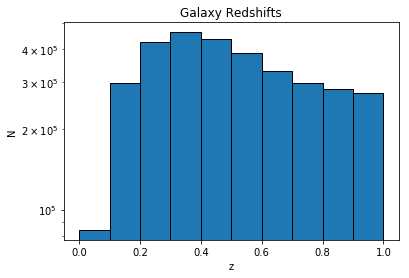

In [33]:
plt.figure(figsize=(6, 4))
plt.hist(simus.gx_z, log=True)
plt.ylabel('N')
plt.xlabel('z')
plt.title('Galaxy Redshifts')
plt.savefig('gx_redshifts.pdf', dpi=480)

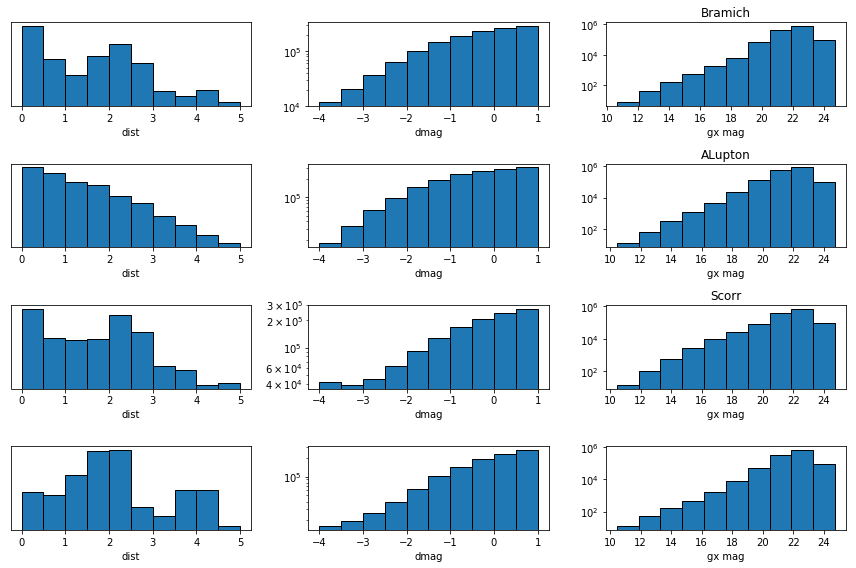

In [34]:
plt.figure(figsize=(12, 8))
plt.title('Zackay')
plt.subplot(431)
plt.hist(und_z.r_scales, log=True)
plt.xlabel('dist')
plt.subplot(432)
plt.hist(und_z.app_mag_x - und_z.gx_mag, log=True)
plt.xlabel('dmag')
plt.subplot(433)
plt.hist(und_z.gx_mag, log=True)
plt.xlabel('gx mag')

plt.title('Bramich')
plt.subplot(434)
plt.hist(und_o.r_scales, log=True)
plt.xlabel('dist')
plt.subplot(435)
plt.hist(und_o.app_mag_x - und_o.gx_mag, log=True)
plt.xlabel('dmag')
plt.subplot(436)
plt.hist(und_o.gx_mag, log=True)
plt.xlabel('gx mag')

plt.title('ALupton')
plt.subplot(437)
plt.hist(und_h.r_scales, log=True)
plt.xlabel('dist')
plt.subplot(438)
plt.hist(und_h.app_mag_x - und_h.gx_mag, log=True)
plt.xlabel('dmag')
plt.subplot(439)
plt.hist(und_h.gx_mag, log=True)
plt.xlabel('gx mag')

plt.title('Scorr')
plt.subplot(4, 3, 10)
plt.hist(und_s.r_scales, log=True)
plt.xlabel('dist')
plt.subplot(4, 3, 11)
plt.hist(und_s.app_mag_x - und_s.gx_mag, log=True)
plt.xlabel('dmag')
plt.subplot(4, 3, 12)
plt.hist(und_s.gx_mag, log=True)
plt.xlabel('gx mag')
plt.tight_layout()

In [35]:
preds_ois = pd.merge(ois_rec, dt_ois, on='id', how='inner')

In [36]:
preds_zps = pd.merge(zps_rec, dt_zps, on='id', how='inner')

In [37]:
preds_sps = pd.merge(sps_rec, dt_sps, on='id', how='inner')

In [38]:
preds_hot = pd.merge(hot_rec, dt_hot, on='id', how='inner')

In [39]:
preds_ois['delta_mag'] = preds_ois['sim_mag'] - preds_ois['gx_mag']
preds_zps['delta_mag'] = preds_zps['sim_mag'] - preds_zps['gx_mag']
preds_sps['delta_mag'] = preds_sps['sim_mag'] - preds_sps['gx_mag']
preds_hot['delta_mag'] = preds_hot['sim_mag'] - preds_hot['gx_mag']

In [40]:
und_z.columns

Index(['x', 'y', 'app_mag_x', 'image_id', 'simulated_id', 'id_x', 'app_mag_y',
       'r_scales', 'PA_angle', 'gx_mag', 'gx_code', 'gx_x', 'gx_y',
       'gx_bulge_total', 'gx_bulge_eff_r', 'gx_bulge_app_aspect',
       'gx_bulge_PA', 'gx_disk_scale_len', 'gx_disk_app_aspect', 'gx_disk_PA',
       'gx_z', 'gx_hubble_type', 'simulation_id', 'simage_id', 'id_y', 'code',
       'executed', 'loaded', 'crossmatched', 'failed_to_subtract',
       'possible_saturation', 'ref_starzp', 'ref_starslope', 'ref_fwhm',
       'new_fwhm', 'm1_diam', 'm2_diam', 'eff_col', 'px_scale',
       'ref_back_sbright', 'new_back_sbright', 'exp_time'],
      dtype='object')

In [41]:
und_o['delta_mag'] = und_o['app_mag_x'] - und_o['gx_mag']
und_z['delta_mag'] = und_z['app_mag_x'] - und_z['gx_mag']
und_s['delta_mag'] = und_s['app_mag_x'] - und_s['gx_mag']
und_h['delta_mag'] = und_h['app_mag_x'] - und_h['gx_mag']

In [42]:
mls = ['y_pred_knn0', 'y_pred_knn', 'y_pred_rfo0', 'y_pred_rfo',
       'y_pred_svc0', 'y_pred_svc']

In [182]:
bins_d = np.arange(0, 5.1, 5/3.)
bins_m = np.arange(-4, 1.26, 0.715)

In [183]:
print(bins_d)
print(bins_m)

[0.         1.66666667 3.33333333 5.        ]
[-4.    -3.285 -2.57  -1.855 -1.14  -0.425  0.29   1.005]


In [63]:
report = """
TP = {}  | FP = {}  |
FN = {}  | TN = {} |

FN_dia = {}
FN_ml  = {}

P = {}
R = {}

F1 = {}
"""

In [64]:
def dist_vs_dmag(und, preds, bins_d, bins_m):

    F1 = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    FN = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    FN_dia = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    FN_ml = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    TP = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    FP = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    TN = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    P = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))
    R = np.zeros((6, bins_d.shape[0]-1, bins_m.shape[0]-1))

    for ibin_m, abin_m in enumerate(bins_m[:-1]):
        for ibin_d, abin_d in enumerate(bins_d[:-1]):
    
            subset = preds.loc[preds['delta_mag'] >= abin_m]
            subset = subset.loc[subset['delta_mag'] < bins_m[ibin_m+1]]

            subset = subset.loc[subset['r_scales'] >= abin_d]
            subset = subset.loc[subset['r_scales'] < bins_d[ibin_d+1]]
            #subset = [f]

            subset_und = und.loc[und['delta_mag'] >= abin_m]
            subset_und = subset_und.loc[subset_und['delta_mag'] < bins_m[ibin_m+1]]

            subset_und = subset_und.loc[subset_und['r_scales'] >= abin_d]
            subset_und = subset_und.loc[subset_und['r_scales'] < bins_d[ibin_d+1]]
            
            #import ipdb; ipdb.set_trace()
            fn_dia = len(subset_und)
            is_real = subset['IS_REAL'].values.ravel()

            for iml, ml_name in enumerate(mls):
                #print(iml, ml_name)
                y_preds = subset[ml_name].values.ravel()
                #print(np.sum(y_preds))
                tp = np.sum(is_real & y_preds)
                fp = np.sum((y_preds==1) & (is_real==0))
                fn_ml = np.sum((y_preds==0.) & (is_real==1.))
                tn = np.sum((y_preds==0.) & (is_real==0.))
                fn = fn_ml + fn_dia
                p = tp/(tp+fp)
                r = tp/(tp+fn)
                #print(r)
                f1 = 2*p*r/(p+r)

                #print(report.format(tp, fp, fn, tn, fn_dia, fn_ml, p, r, f1))
                #print(iml, ibin_d, ibin_m)
                FN[iml, ibin_d, ibin_m] = fn
                FN_dia[iml, ibin_d, ibin_m] = fn_dia
                FN_ml[iml, ibin_d, ibin_m] = fn_ml
                TP[iml, ibin_d, ibin_m] = tp
                FP[iml, ibin_d, ibin_m] = fp
                TN[iml, ibin_d, ibin_m] = tn
                P[iml, ibin_d, ibin_m] = p
                R[iml, ibin_d, ibin_m] = r
                F1[iml, ibin_d, ibin_m] = f1
    return [F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R]

In [46]:
preds_zps.columns

Index(['id', 'y', 'y_pred_knn0', 'y_pred_knn', 'y_pred_rfo0', 'y_pred_rfo',
       'y_pred_svc0', 'y_pred_svc', 'NUMBER', 'FLUX_ISO', 'FLUXERR_ISO',
       'MAG_ISO', 'MAGERR_ISO', 'FLUX_APER', 'FLUXERR_APER', 'MAG_APER',
       'MAGERR_APER', 'FLUX_AUTO', 'FLUXERR_AUTO', 'MAG_AUTO', 'MAGERR_AUTO',
       'BACKGROUND', 'THRESHOLD', 'FLUX_MAX', 'XMIN_IMAGE', 'YMIN_IMAGE',
       'XMAX_IMAGE', 'YMAX_IMAGE', 'XPEAK_IMAGE', 'YPEAK_IMAGE', 'X_IMAGE',
       'Y_IMAGE', 'X2_IMAGE', 'Y2_IMAGE', 'XY_IMAGE', 'CXX_IMAGE', 'CYY_IMAGE',
       'CXY_IMAGE', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 'MU_MAX', 'FLAGS',
       'FWHM_IMAGE', 'ELONGATION', 'ELLIPTICITY', 'CLASS_STAR', 'MU_THRESHOLD',
       'SNR_WIN', 'DELTAX', 'DELTAY', 'RATIO', 'ROUNDNESS', 'PEAK_CENTROID',
       'IS_REAL', 'image_id', 'sim_mag', 'r_scales', 'gx_mag', 'sim_id',
       'm1_diam', 'm2_diam', 'executed', 'id_simulation', 'ref_starzp',
       'ref_starslope', 'ref_fwhm', 'new_fwhm', 'eff_col', 'px_scale',
       'ref_back_sbri

In [47]:
trn = ['knn', 'knn_fsel', 'RF', 'RF fsel', 'SVM', 'SVM Fsel']

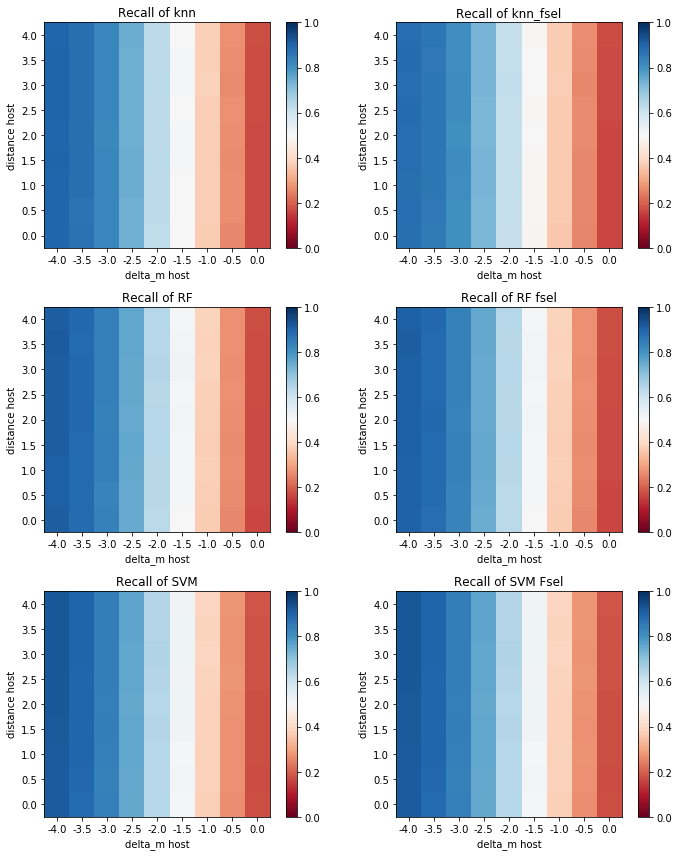

In [48]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = dist_vs_dmag(und_z, preds_zps, bins_d, bins_m)
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(R[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_d)-1), bins_d[:-1])
    plt.xticks(range(len(bins_m)-1), bins_m[:-1])
    
    plt.ylabel('distance host')
    plt.xlabel('delta_m host')
    
    plt.colorbar()
plt.tight_layout()
plt.savefig('dis_vs_dmag_zackay.svg', format='svg', dpi=480)

In [49]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = dist_vs_dmag(und_s, preds_sps, bins_d, bins_m)

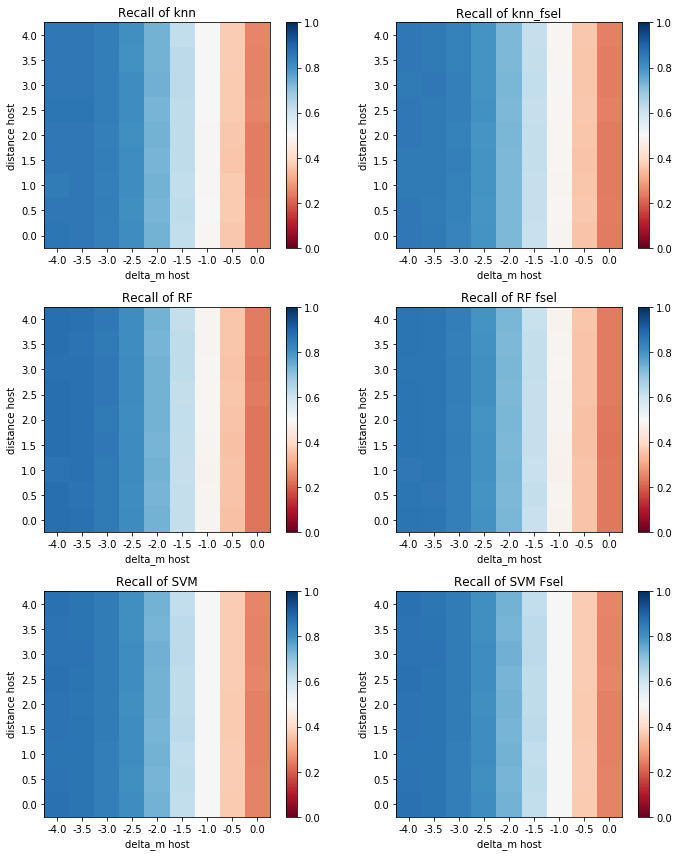

In [50]:
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(R[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_d)-1), bins_d[:-1])
    plt.xticks(range(len(bins_m)-1), bins_m[:-1])
    
    plt.ylabel('distance host')
    plt.xlabel('delta_m host')
        
    plt.colorbar()
plt.tight_layout()
plt.savefig('dis_vs_dmag_scorr.svg', format='svg', dpi=480)

In [51]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = dist_vs_dmag(und_o, preds_ois, bins_d, bins_m)

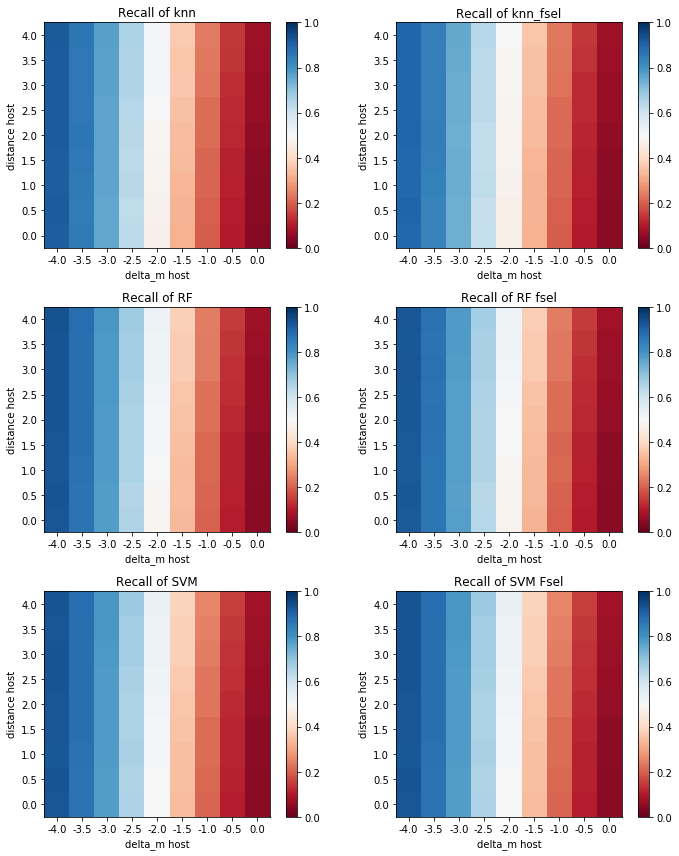

In [52]:
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(R[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_d)-1), bins_d[:-1])
    plt.xticks(range(len(bins_m)-1), bins_m[:-1])
    
    plt.ylabel('distance host')
    plt.xlabel('delta_m host')
    
    plt.colorbar()
plt.tight_layout()
plt.savefig('dis_vs_dmag_bramich.svg', format='svg', dpi=480)

In [184]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = dist_vs_dmag(und_h, preds_hot, bins_d, bins_m)

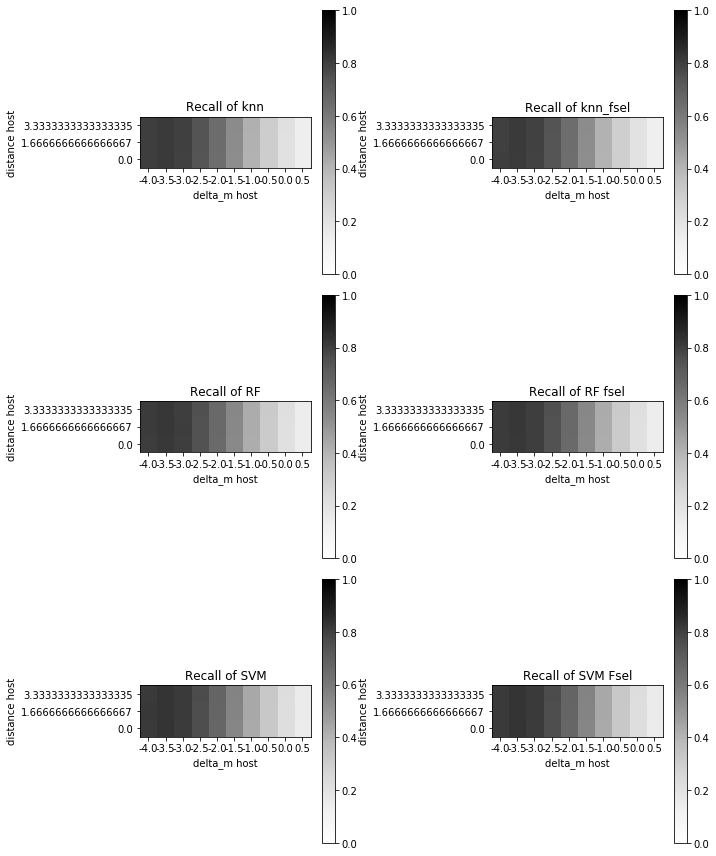

In [87]:
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(R[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='Greys')
    plt.yticks(range(len(bins_d)-1), bins_d[:-1])
    plt.xticks(range(len(bins_m)-1), bins_m[:-1])
    
    plt.ylabel('distance host')
    plt.xlabel('delta_m host')
    
    plt.colorbar()
plt.tight_layout()
plt.savefig('dis_vs_dmag_alupton.svg', format='svg', dpi=480)

In [185]:
R[4, ].shape

(3, 7)

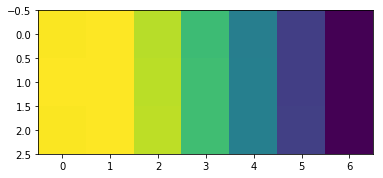

In [186]:
matrix = R[4, :, :]
plt.imshow(matrix)

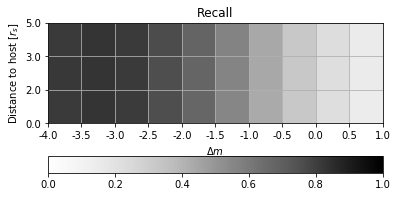

In [111]:
plt.title('Recall')
plt.imshow(matrix, cmap='Greys', origin='lower', vmax=1, vmin=0.)

#plt.xlim(0, matrix.shape[1]-1)
#plt.ylim(0, matrix.shape[0]-1)
plt.yticks(np.arange(matrix.shape[0]+1)-0.5, np.round(bins_d))
plt.xticks(np.arange(matrix.shape[1]+1)-0.5, np.round(bins_m, 2))

plt.ylabel(r'Distance to host [$r_s$]')
plt.xlabel('$\Delta m$')
plt.colorbar(orientation='horizontal')

plt.grid()

In [116]:
np.log10(np.array([4e3, 8e3, 16e3, 32e3, 64e3, 128e3, 256e3]))

array([3.60205999, 3.90308999, 4.20411998, 4.50514998, 4.80617997,
       5.10720997, 5.40823997])

In [117]:
bins_zp = np.arange(3.6, 5.7, 0.3)
bins_sl = np.arange(0, 1.3, 0.4)

In [118]:
print(bins_zp)
print(bins_sl)

[3.6 3.9 4.2 4.5 4.8 5.1 5.4 5.7]
[0.  0.4 0.8 1.2]


In [119]:
def slope_vs_zp(und, preds, bins_zp, bins_sl):

    F1 = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    FN = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    FN_dia = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    FN_ml = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    TP = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    FP = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    TN = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    P = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))
    R = np.zeros((6, bins_sl.shape[0]-1, bins_zp.shape[0]-1))

    for ibin_zp, abin_zp in enumerate(bins_zp[:-1]):
        for ibin_sl, abin_sl in enumerate(bins_sl[:-1]):

            subset = preds.loc[np.log10(preds['ref_starzp']) >= abin_zp]
            subset = subset.loc[np.log10(subset['ref_starzp']) < bins_zp[ibin_zp+1]]
            #import ipdb; ipdb.set_trace()
            subset = subset.loc[subset['ref_starslope'] >= abin_sl]
            subset = subset.loc[subset['ref_starslope'] < bins_d[ibin_sl+1]]
            #subset = [f]

            subset_und = und.loc[und['ref_starzp'] >= abin_zp]
            subset_und = subset_und.loc[subset_und['ref_starzp'] < bins_zp[ibin_zp+1]]

            subset_und = subset_und.loc[np.log10(subset_und['ref_starslope']) >= abin_sl]
            subset_und = subset_und.loc[np.log10(subset_und['ref_starslope']) < bins_sl[ibin_sl+1]]
            
            
            fn_dia = len(subset_und)
            is_real = subset['IS_REAL'].values.ravel()

            for iml, ml_name in enumerate(mls):
                #print(iml, ml_name)
                y_preds = subset[ml_name].values.ravel()
                #print(np.sum(y_preds))
                tp = np.sum(is_real & y_preds)
                fp = np.sum((y_preds==1) & (is_real==0))
                fn_ml = np.sum((y_preds==0.) & (is_real==1.))
                tn = np.sum((y_preds==0.) & (is_real==0.))
                fn = fn_ml + fn_dia
                p = tp/(tp+fp)
                r = tp/(tp+fn)
                #print(r)
                f1 = 2*p*r/(p+r)

                #print(report.format(tp, fp, fn, tn, fn_dia, fn_ml, p, r, f1))
                #print(iml, ibin_d, ibin_m)
                FN[iml, ibin_sl, ibin_zp] = fn
                FN_dia[iml, ibin_sl, ibin_zp] = fn_dia
                FN_ml[iml, ibin_sl, ibin_zp] = fn_ml
                TP[iml, ibin_sl, ibin_zp] = tp
                FP[iml, ibin_sl, ibin_zp] = fp
                TN[iml, ibin_sl, ibin_zp] = tn
                P[iml, ibin_sl, ibin_zp] = p
                R[iml, ibin_sl, ibin_zp] = r
                F1[iml, ibin_sl, ibin_zp] = f1
                
    return [F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R]

In [143]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = slope_vs_zp(und_z, preds_zps, bins_zp, bins_sl)

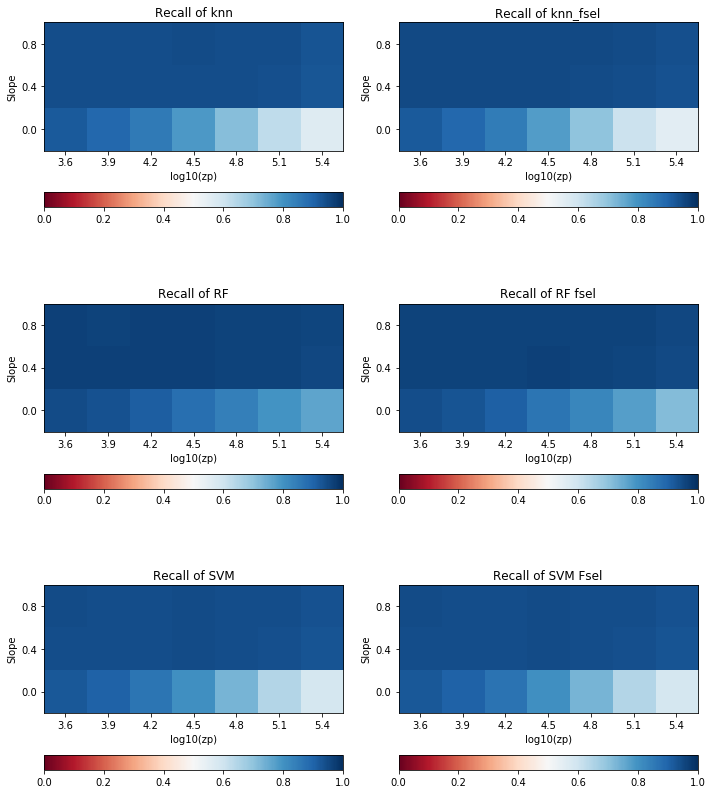

In [144]:
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(F1[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_sl)-1), bins_sl[:-1])
    plt.xticks(range(len(bins_zp)-1), [4e3, 8e3, 16e3, 32e3, 64e3, 128e3]) #np.round(bins_zp[:-1], 2))
    
    plt.ylabel('Slope')
    plt.xlabel('log10(zp)')
    
    plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.savefig('slope_vs_zp_zackay.svg', format='svg', dpi=480)

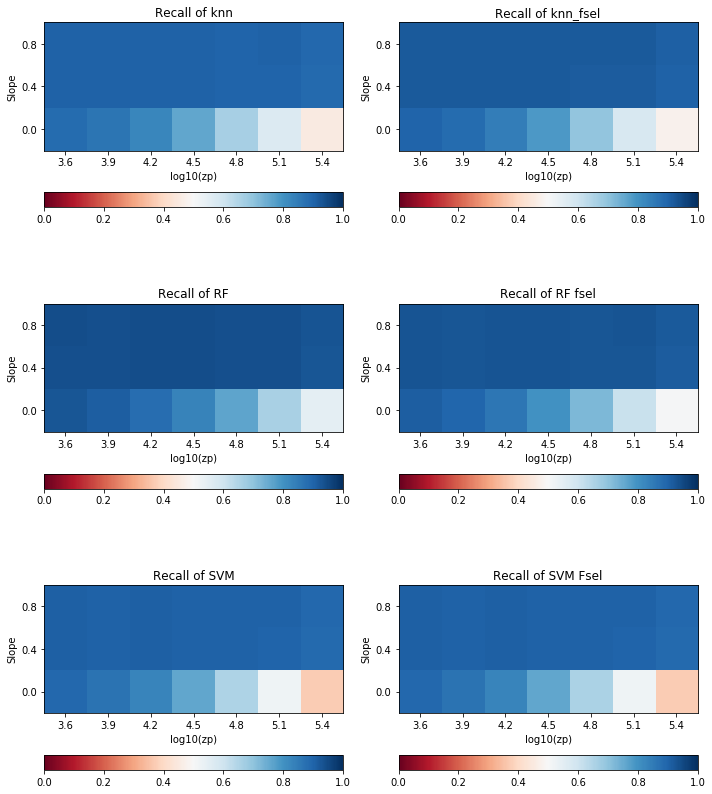

In [145]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = slope_vs_zp(und_s, preds_sps, bins_zp, bins_sl)
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(F1[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_sl)-1), bins_sl[:-1])
    plt.xticks(range(len(bins_zp)-1), np.round(bins_zp[:-1], 2))
    
    plt.ylabel('Slope')
    plt.xlabel('log10(zp)')
    
    plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.savefig('slope_vs_zp_scorr.svg', format='svg', dpi=480)

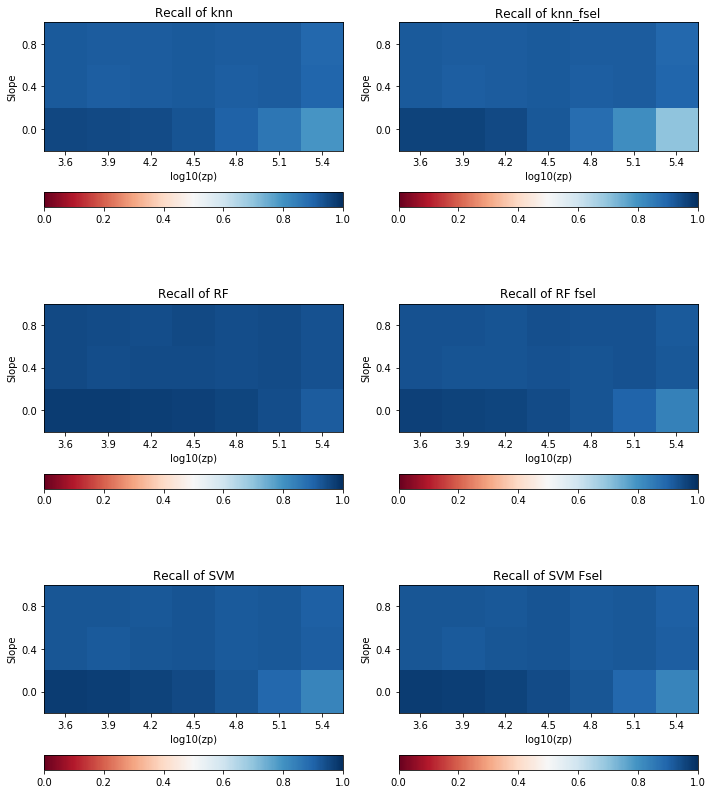

In [146]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = slope_vs_zp(und_o, preds_ois, bins_zp, bins_sl)
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(F1[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_sl)-1), bins_sl[:-1])
    plt.xticks(range(len(bins_zp)-1), np.round(bins_zp[:-1], 2))
    
    plt.ylabel('Slope')
    plt.xlabel('log10(zp)')
    
    plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.savefig('slope_vs_zp_bramich.svg', format='svg', dpi=480)

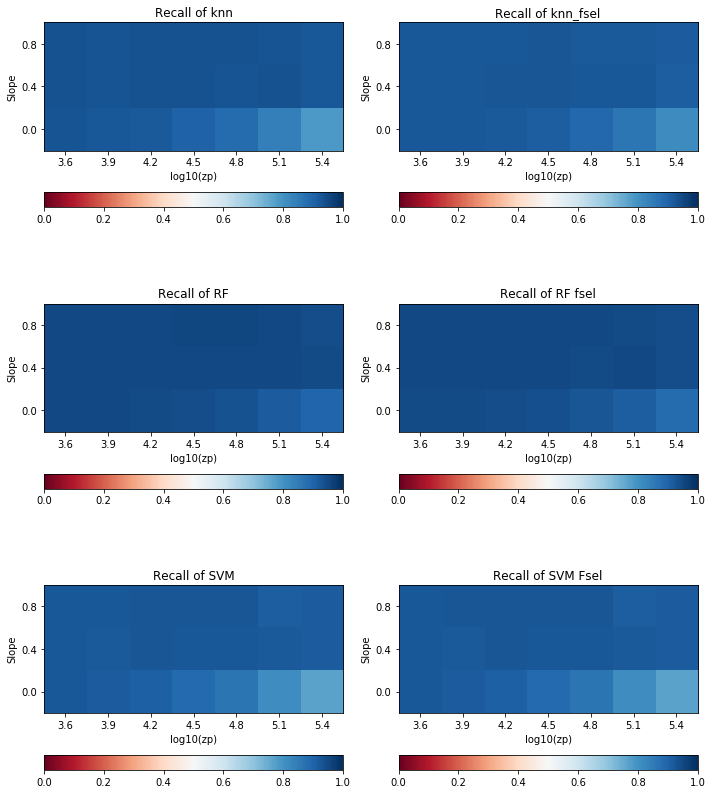

In [121]:
F1, FN, FN_dia, FN_ml, TP, FP, TN, P, R = slope_vs_zp(und_h, preds_hot, bins_zp, bins_sl)
plt.figure(figsize=(10, 12))
for iml, ml_name in enumerate(mls):
    plt.subplot(3, 2, iml+1)
    plt.title("Recall of "+trn[iml])
    plt.imshow(F1[iml,:, :],interpolation='nearest', origin='lower', vmin=0, vmax=1., cmap='RdBu')
    plt.yticks(range(len(bins_sl)-1), bins_sl[:-1])
    plt.xticks(range(len(bins_zp)-1), np.round(bins_zp[:-1], 2))
    
    plt.ylabel('Slope')
    plt.xlabel('log10(zp)')
    
    plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.savefig('slope_vs_zp_alupton.svg', format='svg', dpi=480)

In [122]:
matrix2 = R[4, :, :]

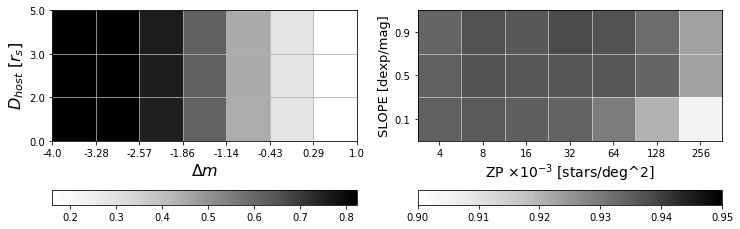

In [192]:
plt.figure(figsize=(12, 6))
plt.title('Recall')
plt.subplot(121)
plt.imshow(matrix, cmap='Greys', origin='lower')#, vmax=1, vmin=0.)
#plt.xlim(0, matrix.shape[1]-1)
#plt.ylim(0, matrix.shape[0]-1)
plt.yticks(np.arange(matrix.shape[0]+1)-0.5, np.round(bins_d))
plt.xticks(np.arange(matrix.shape[1]+1)-0.5, np.round(bins_m, 2))
plt.ylabel(r'$D_{host}$ [$r_s$]', fontsize=16)
plt.xlabel('$\Delta m$', fontsize=16)
plt.colorbar(orientation='horizontal')
plt.grid()


plt.subplot(122)
plt.imshow(matrix2, cmap='Greys', origin='lower', vmax=.95, vmin=0.9)
#plt.xlim(0, matrix.shape[1]-1)
#plt.ylim(0, matrix.shape[0]-1)
plt.yticks(np.arange(matrix2.shape[0]), [0.1, 0.5, 0.9])
plt.xticks(np.arange(matrix2.shape[1]), [4, 8, 16, 32, 64, 128, 256])
plt.ylabel(r'SLOPE [dexp/mag]', fontsize=13)
plt.xlabel(r'ZP $\times 10^{-3}$ [stars/deg^2]', fontsize=14)
plt.colorbar(orientation='horizontal')


plt.hlines(y=0.5, xmin=-0.5, xmax=6.5, color='white', lw=0.5)
plt.hlines(y=1.5, xmin=-0.5, xmax=6.5, color='white', lw=0.5)

plt.vlines(x=0.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)
plt.vlines(x=1.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)
plt.vlines(x=2.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)
plt.vlines(x=3.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)
plt.vlines(x=4.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)
plt.vlines(x=5.5, ymin=-0.5, ymax=2.5, color='white', lw=0.5)

plt.savefig('recall_maps_alard.pdf', dpi=480)
#plt.grid()#(np.arange(matrix2.shape[0])-0.5), np.arange(matrix2.shape[1]-0.5))

#plt.tight_layout()